#### 환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습
#### 데이터 -> 랜덤 더미 데이터

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import wilcoxon

### 치료전, 후 데이터 랜덤하게 생성

In [2]:
pre_treatment = np.random.randint(1,10, size=20)
post_treatment = pre_treatment + np.random.randint(-3,4, size=20)

# 데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})
data

,pre_treatment,post_treatment
0,3,0
1,1,3
2,5,2
3,6,4
4,2,4
5,8,9
6,1,-1
7,7,4
8,5,7
9,7,6


In [3]:
os.makedirs("./data", exist_ok=True)
data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')

In [4]:
data = pd.read_csv("./data/treatment_data.csv")
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])
print(stat, p)

90.5 0.5958194732666016


In [5]:
if p > 0.05 : 
    print("Fail to reject HO")
else : 
    print("Reject HO")

Fail to reject HO


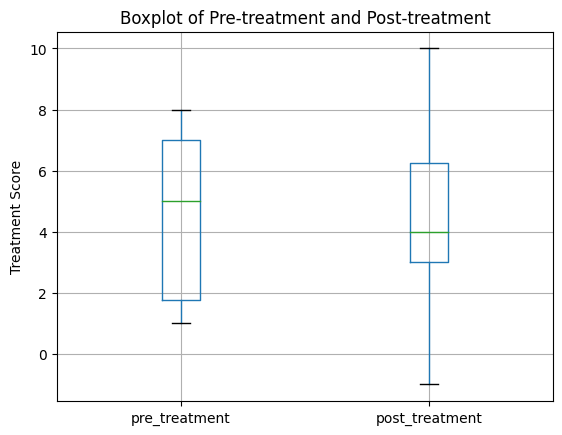

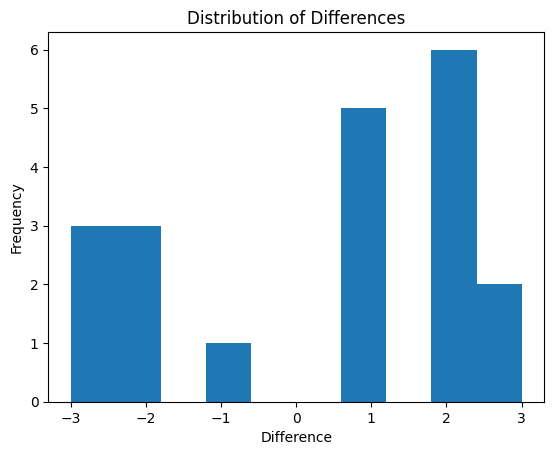

In [6]:
# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()